<a href="https://colab.research.google.com/github/Dimiboi1553/Coral-Bleaching-Detection-System/blob/main/CoralDetectionCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split

bleached_dir = '/content/drive/MyDrive/HACKATHON2023/bleached_corals'
healthy_dir = '/content/drive/MyDrive/HACKATHON2023/healthy_corals'

bleached_files = [os.path.join(bleached_dir, file) for file in os.listdir(bleached_dir)]
healthy_files = [os.path.join(healthy_dir, file) for file in os.listdir(healthy_dir)]

bleached_corals = [cv2.imread(file) for file in bleached_files]
healthy_corals = [cv2.imread(file) for file in healthy_files]

# Resize the images to 300x300 and into numpy arrays
bleached_corals = [cv2.resize(image, (300, 300)) for image in bleached_corals]
healthy_corals = [cv2.resize(image, (300, 300)) for image in healthy_corals]

# Normalize pixel values
bleached_corals = [image/255 for image in bleached_corals]
healthy_corals = [image/255 for image in healthy_corals]

# Create labels
bleached_labels = [1 for _ in bleached_corals]  # 1 represents bleached corals
healthy_labels = [0 for _ in healthy_corals]  # 0 represents healthy corals

# Combine the data
images = bleached_corals + healthy_corals
labels = bleached_labels + healthy_labels

# Split the data
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.05)

In [ ]:
print(len(test_images))

47


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Convert labels to categorical
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

model.fit(np.array(train_images), train_labels_cat, epochs=40, batch_size=32)

loss, accuracy = model.evaluate(np.array(test_images), test_labels_cat)

y_pred = model.predict(np.array(test_images))
y_pred_classes = np.argmax(y_pred, axis=1)

acc = accuracy_score(test_labels, y_pred_classes)

print(f'Accuracy on validation set: {acc}')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select a random image from the test set
idx = np.random.randint(0, len(test_images))
img = test_images[idx]

actual_class = test_labels[idx]

img_tensor = np.expand_dims(img, axis=0)

prediction = model.predict(img_tensor)

predicted_class = np.argmax(prediction, axis=1)

if predicted_class[0] == 0:
  Pred_Value = "Healthy"
else:
  Pred_Value = "Bleached"

if actual_class == 0:
  Actual_Val = "Healthy"
else:
  Actual_Val = "Bleached"


plt.imshow(img)
plt.title(f'Predicted class: {Pred_Value}, Actual class: {Actual_Val}')
plt.show()

In [ ]:
model.save('FinishedAIMODEL.keras')

In [ ]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/HACKATHON2023/FinishedAIMODEL.keras')

1/1 [==============================] - 0s 19ms/step


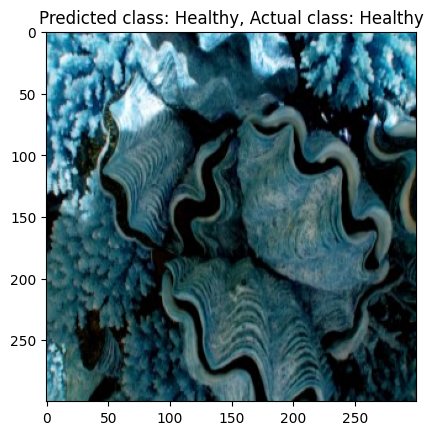

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select a random image from the test set
idx = np.random.randint(0, len(test_images))
img = test_images[idx]

actual_class = test_labels[idx]

img_tensor = np.expand_dims(img, axis=0)

prediction = loaded_model.predict(img_tensor)

predicted_class = np.argmax(prediction, axis=1)

if predicted_class[0] == 0:
  Pred_Value = "Healthy"
else:
  Pred_Value = "Bleached"

if actual_class == 0:
  Actual_Val = "Healthy"
else:
  Actual_Val = "Bleached"


plt.imshow(img)
plt.title(f'Predicted class: {Pred_Value}, Actual class: {Actual_Val}')
plt.show()

In [ ]:
print(len(test_images))

47


In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)

acc = accuracy_score(test_labels, y_pred_classes)

print(f'Accuracy on test set: {acc}')